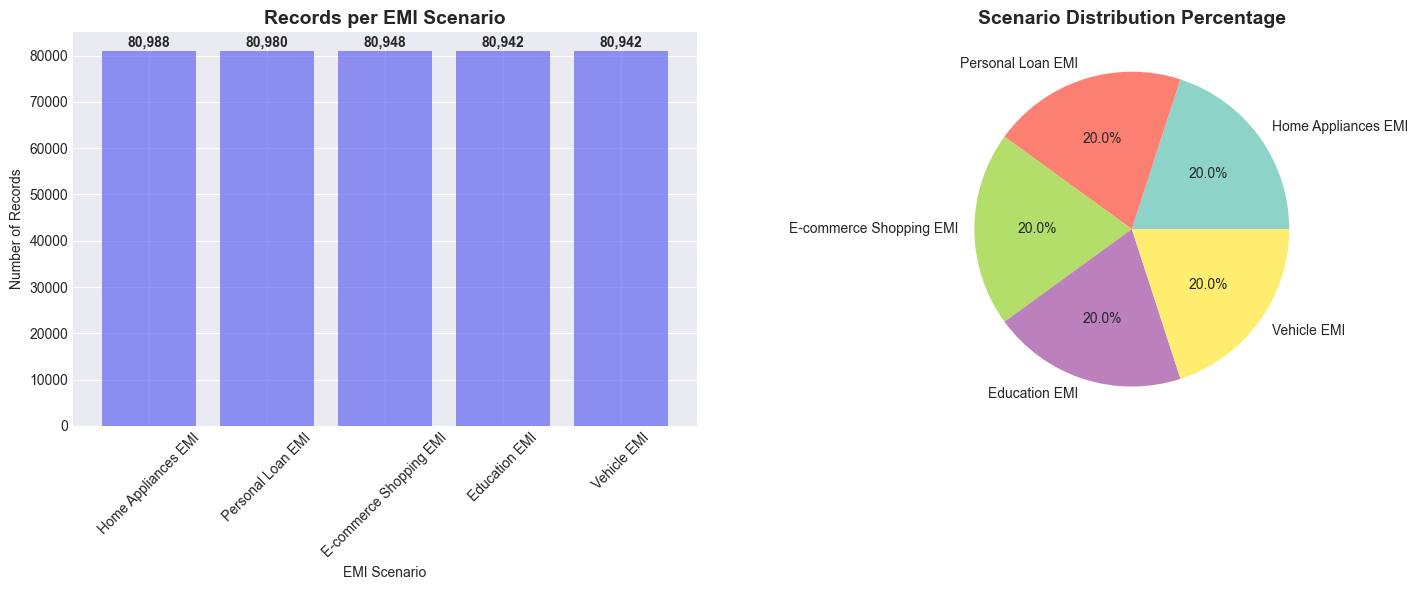

Dataset shape: (404800, 27)

First few rows:
Data Types:
age                        object
gender                     object
marital_status             object
education                  object
monthly_salary             object
employment_type            object
years_of_employment       float64
company_type               object
house_type                 object
monthly_rent              float64
family_size                 int64
dependents                  int64
school_fees               float64
college_fees              float64
travel_expenses           float64
groceries_utilities       float64
other_monthly_expenses    float64
existing_loans             object
current_emi_amount        float64
credit_score              float64
bank_balance               object
emergency_fund            float64
emi_scenario               object
requested_amount          float64
requested_tenure            int64
emi_eligibility            object
max_monthly_emi           float64
dtype: object


Sample va

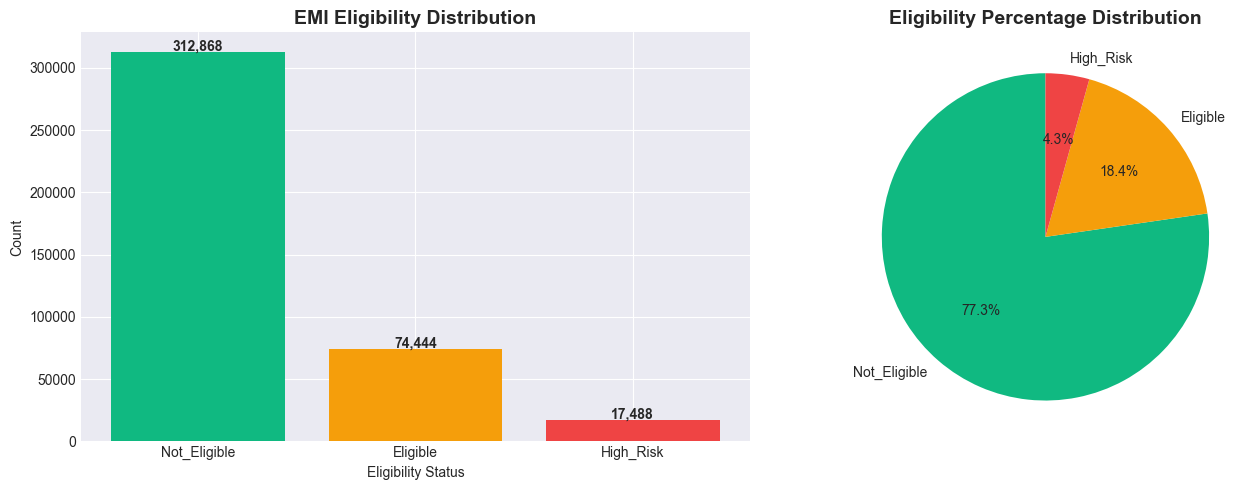

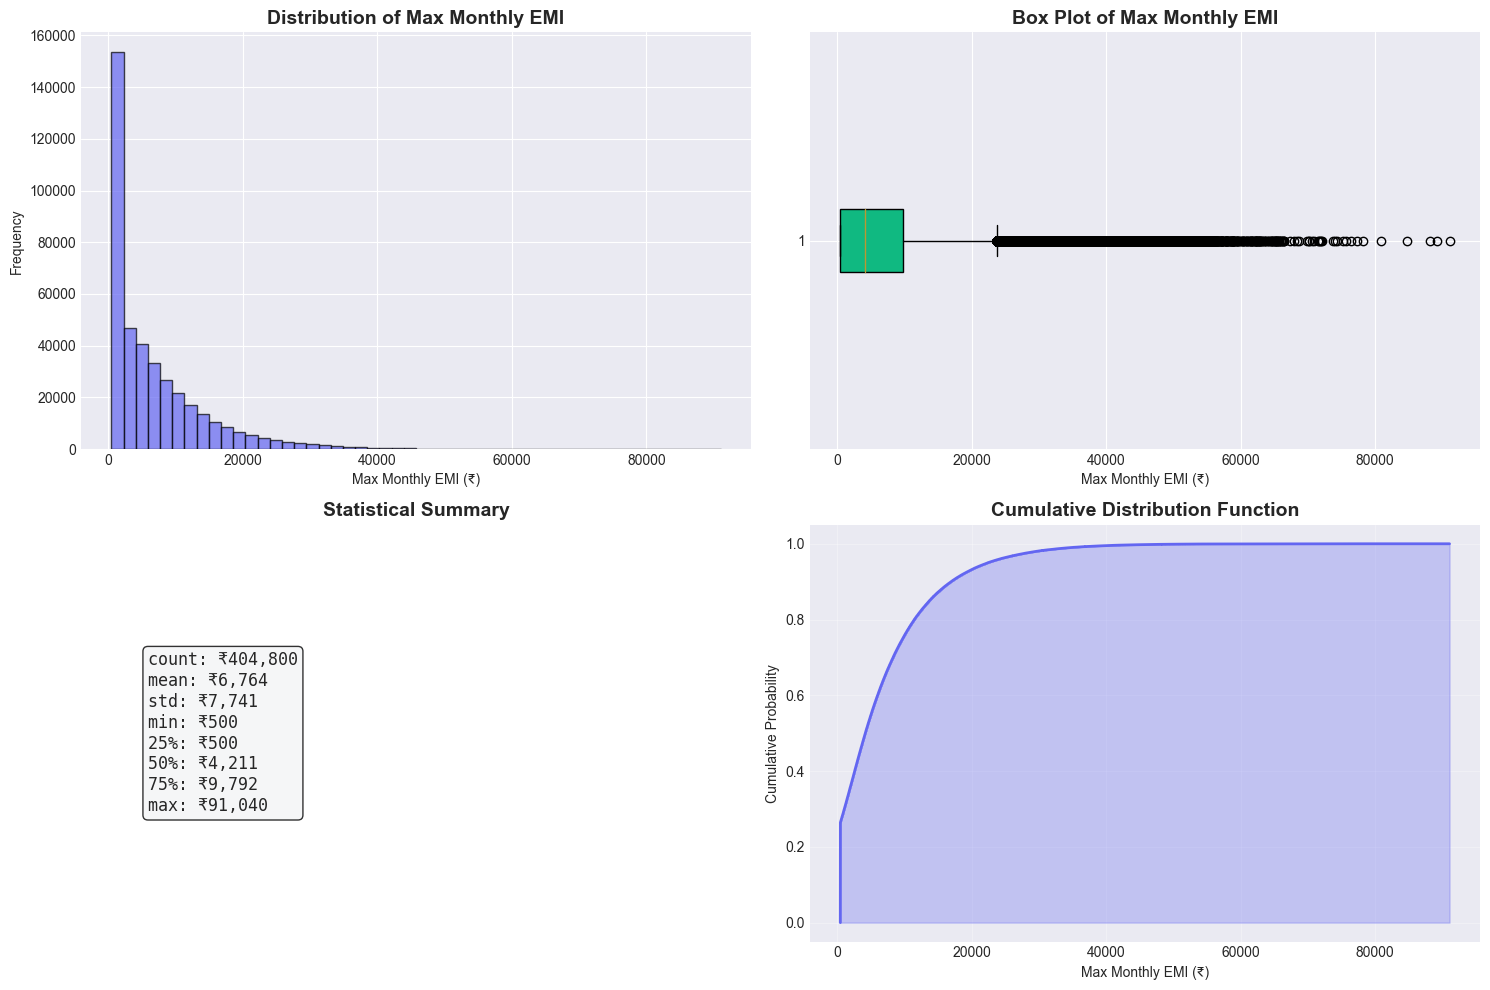

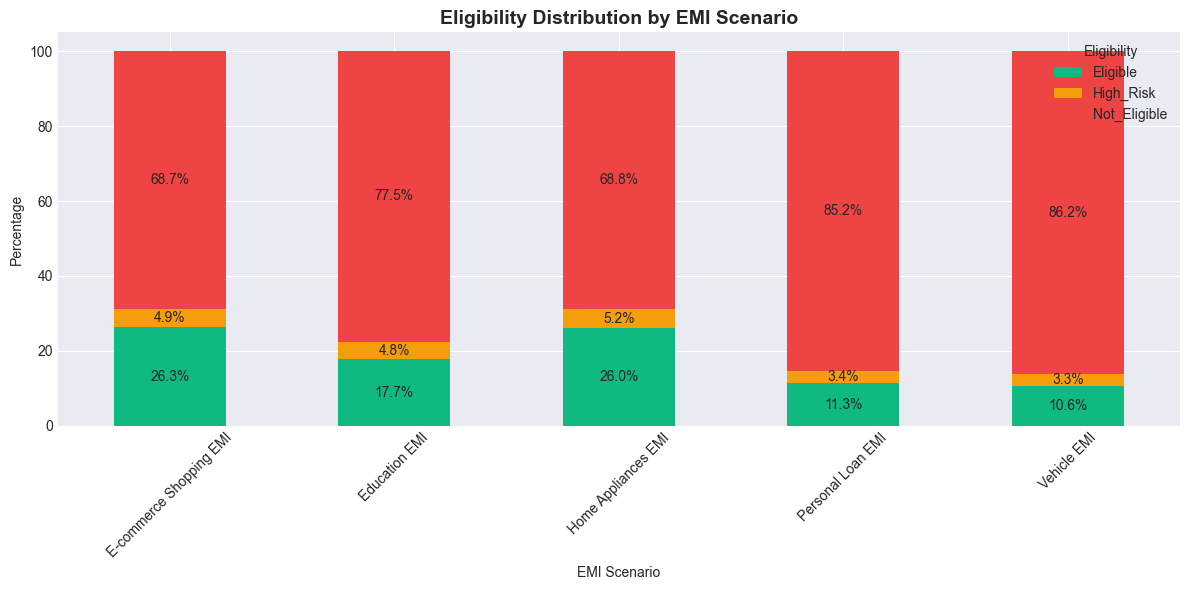

Numerical features: ['age', 'monthly_salary', 'years_of_employment', 'monthly_rent', 'family_size', 'dependents', 'school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities', 'other_monthly_expenses', 'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund', 'requested_amount', 'requested_tenure', 'max_monthly_emi']


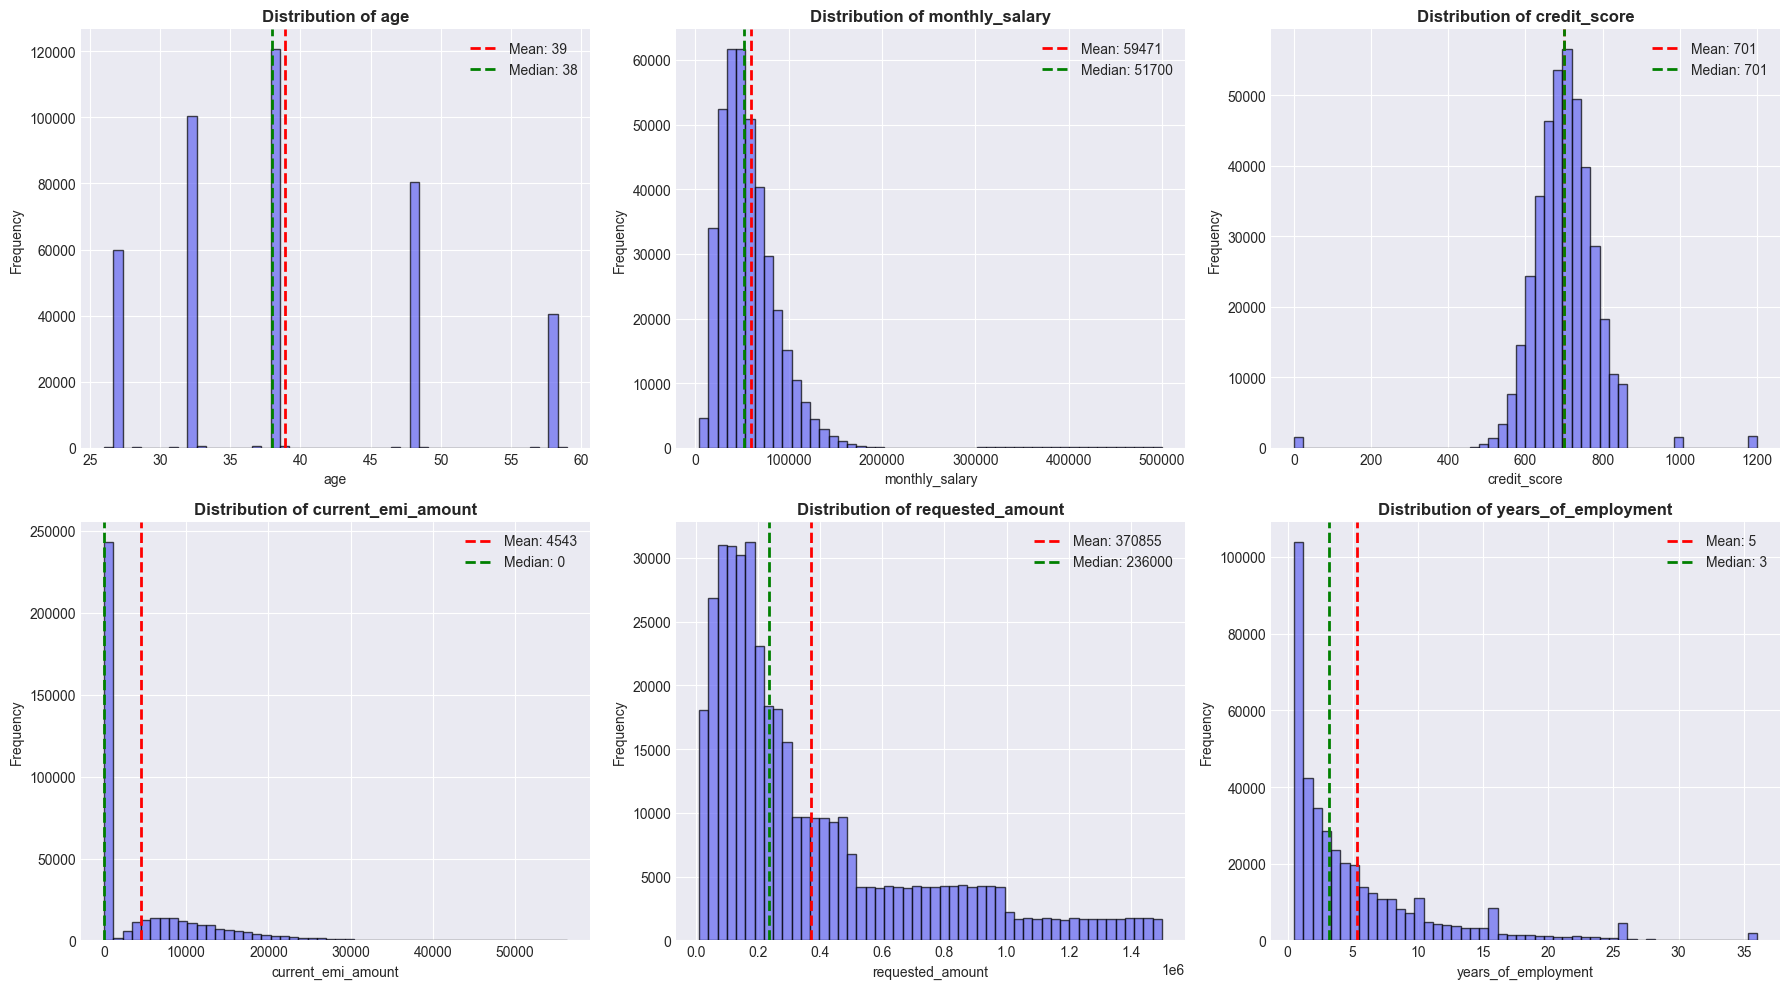

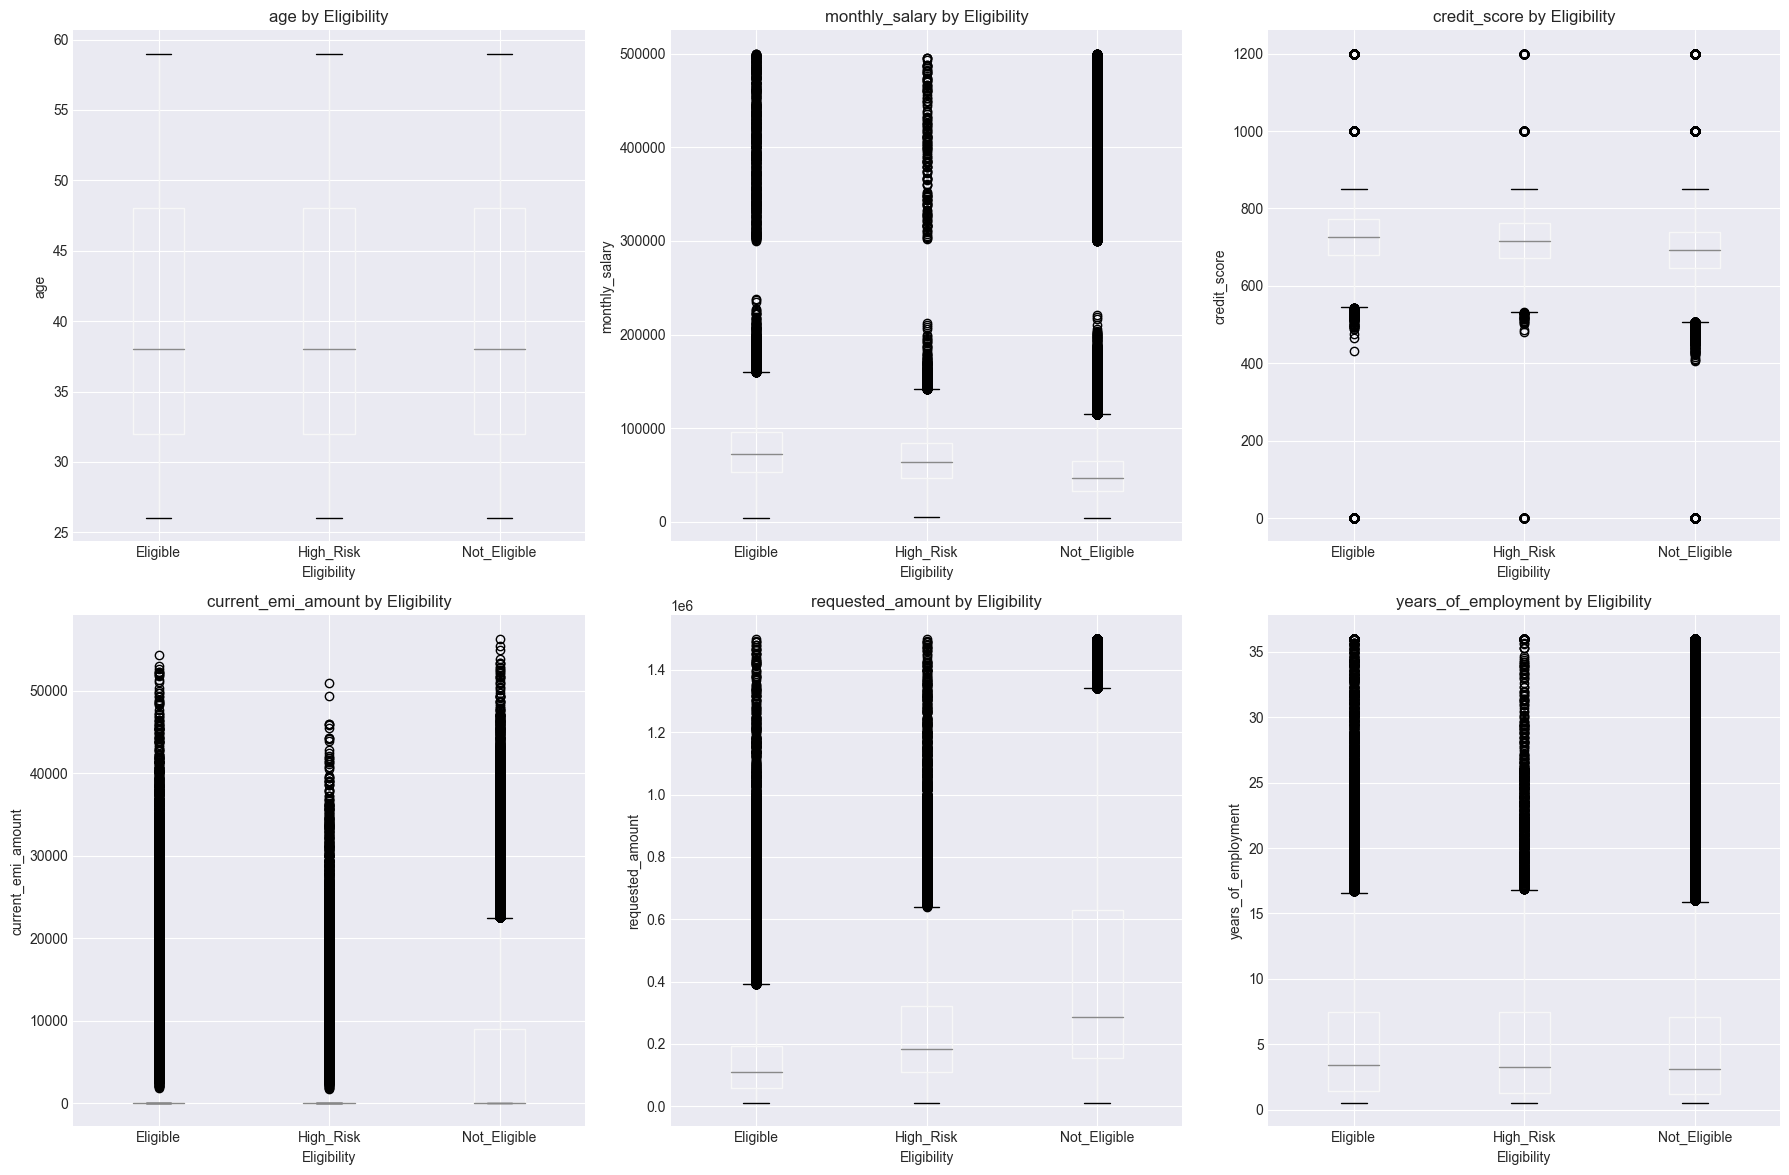

Categorical features: ['gender', 'marital_status', 'education', 'employment_type', 'company_type', 'house_type', 'existing_loans', 'emi_scenario', 'emi_eligibility']


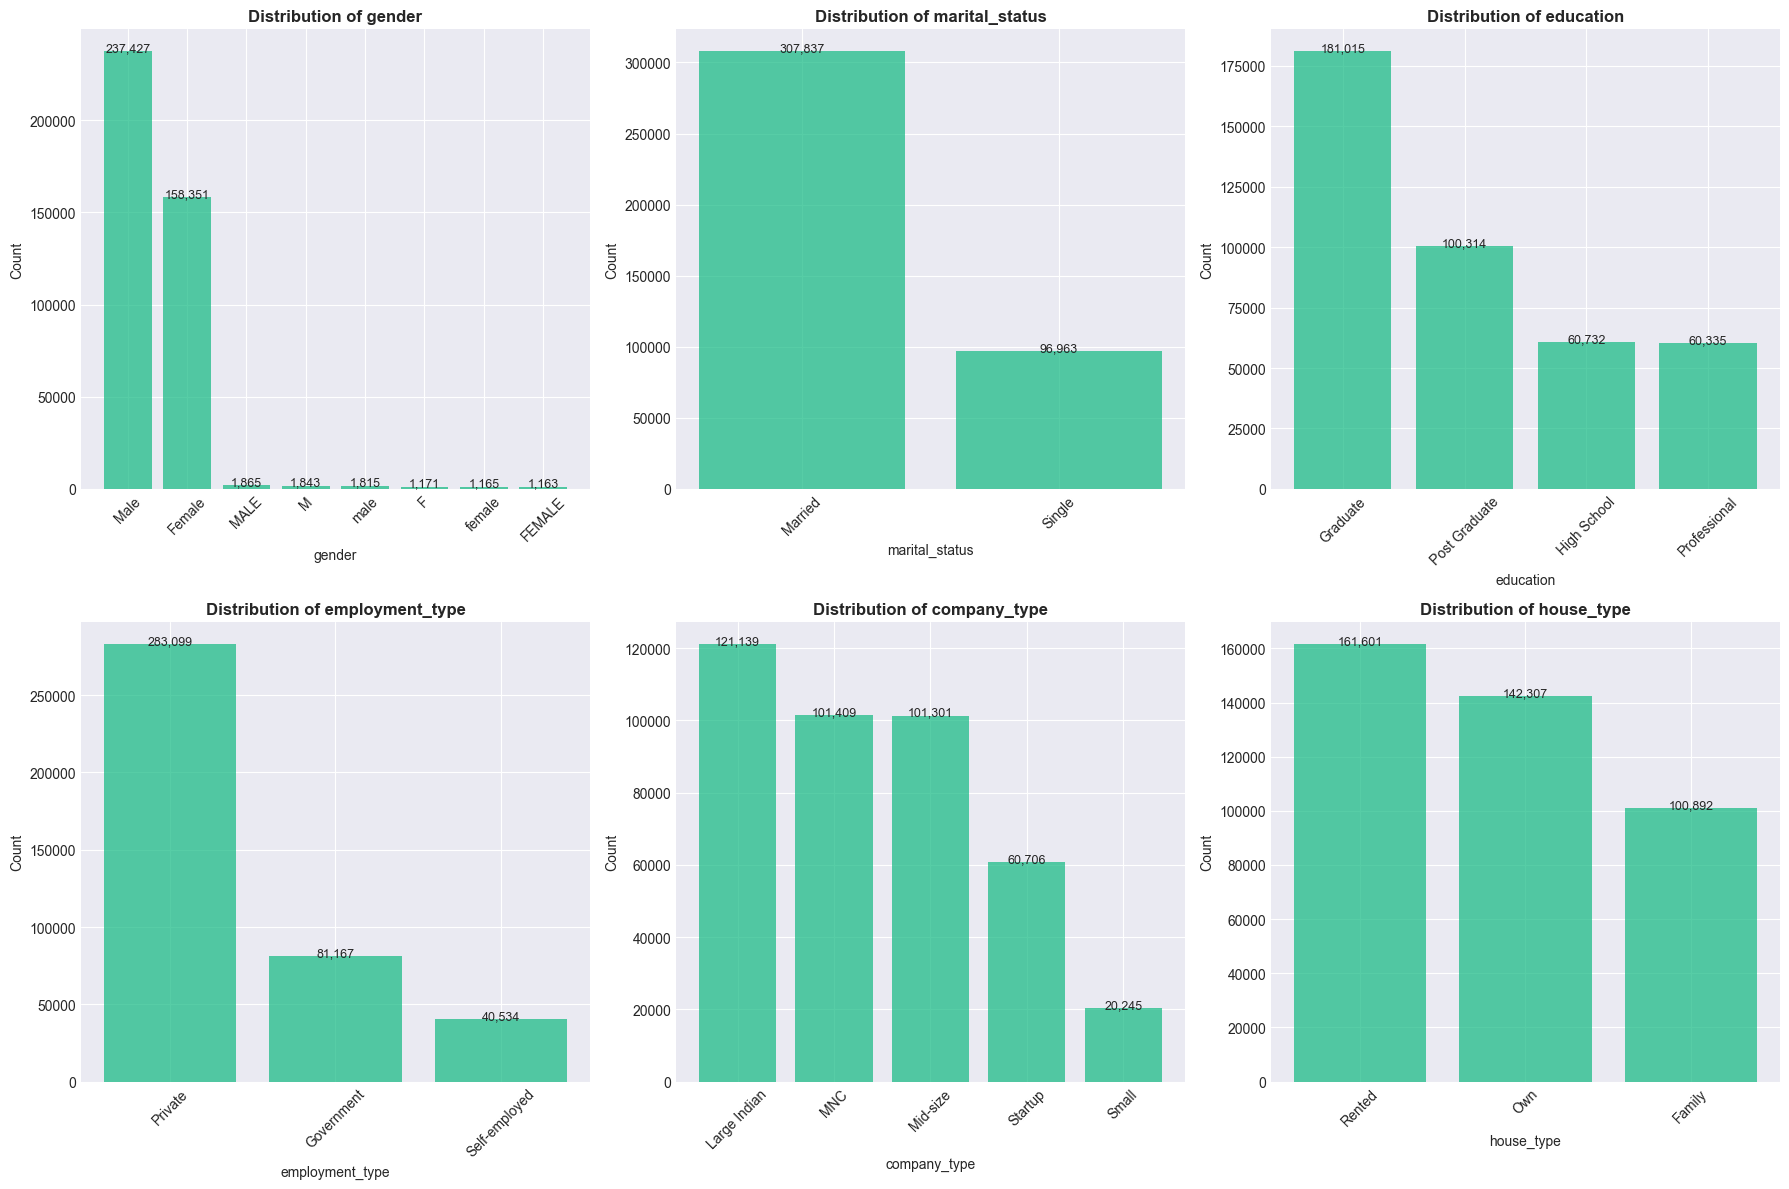

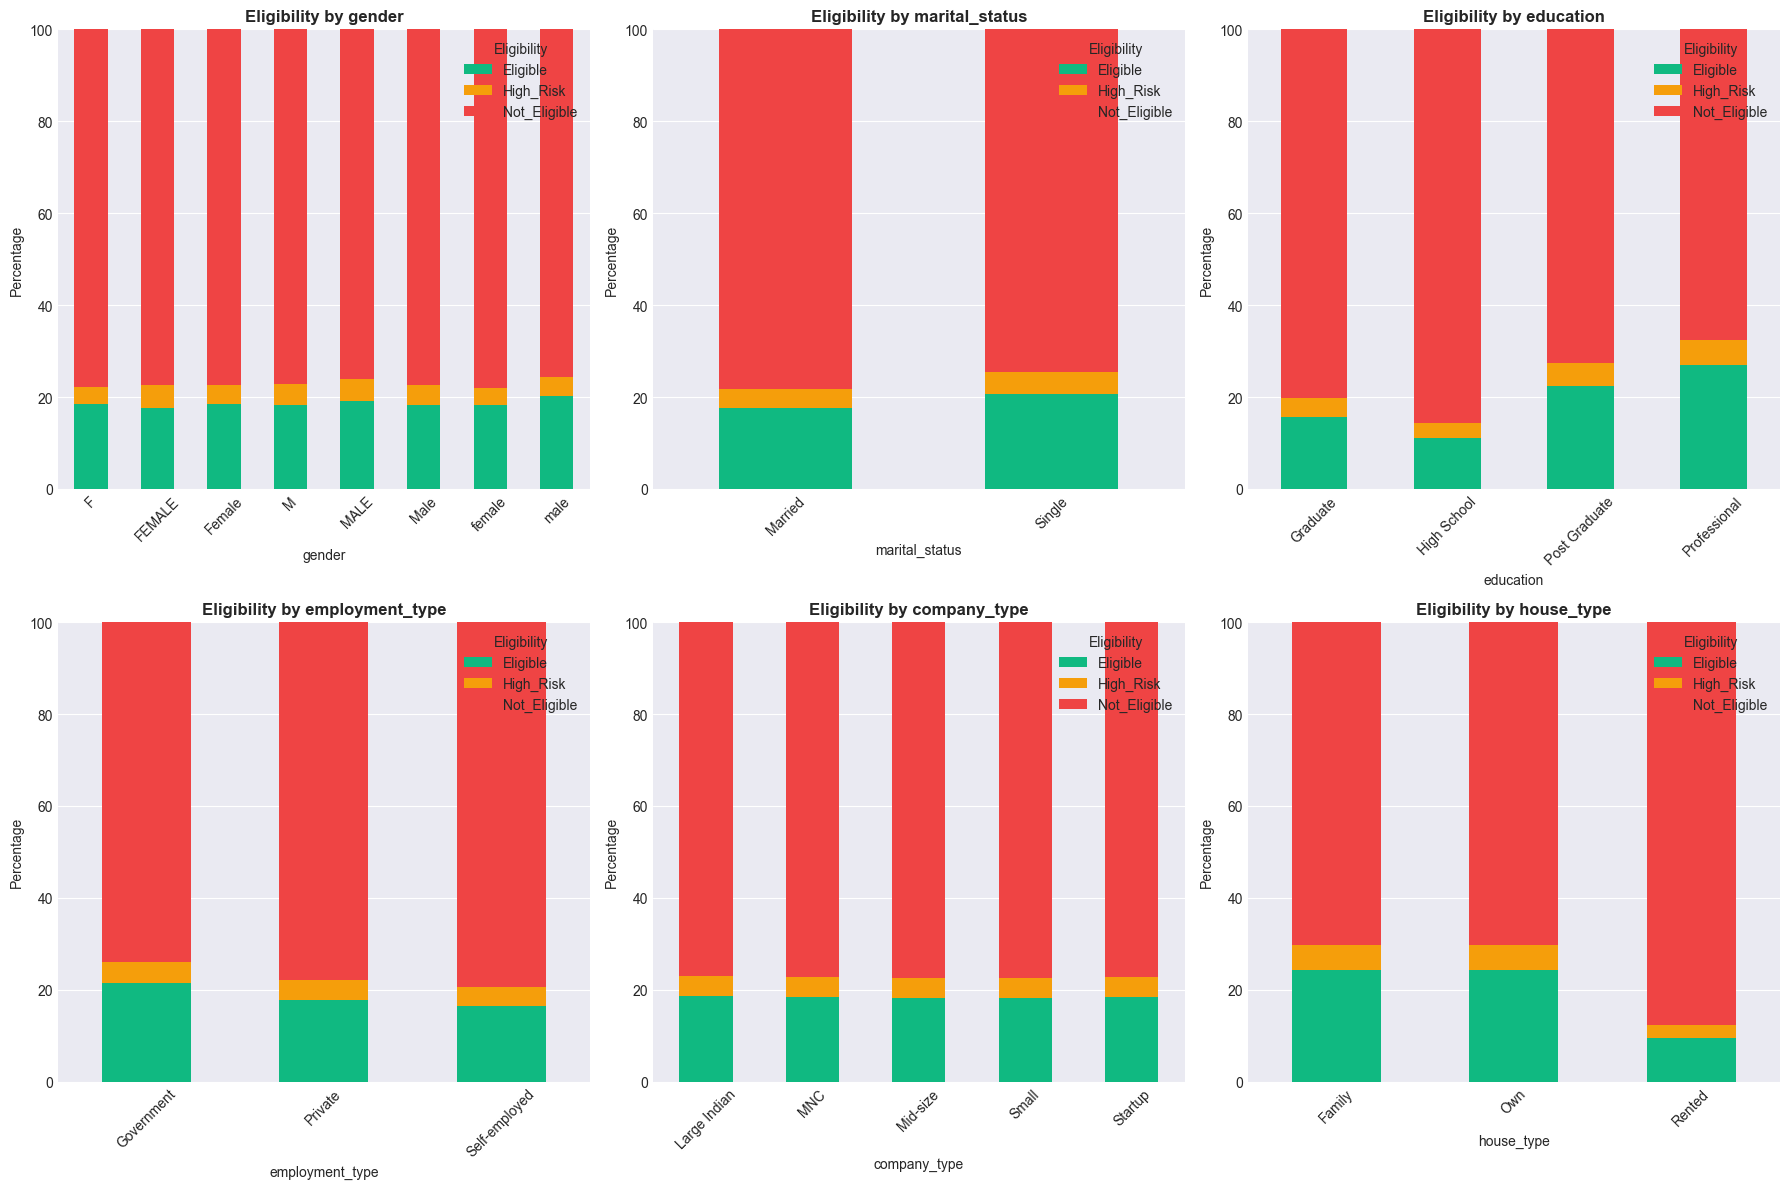

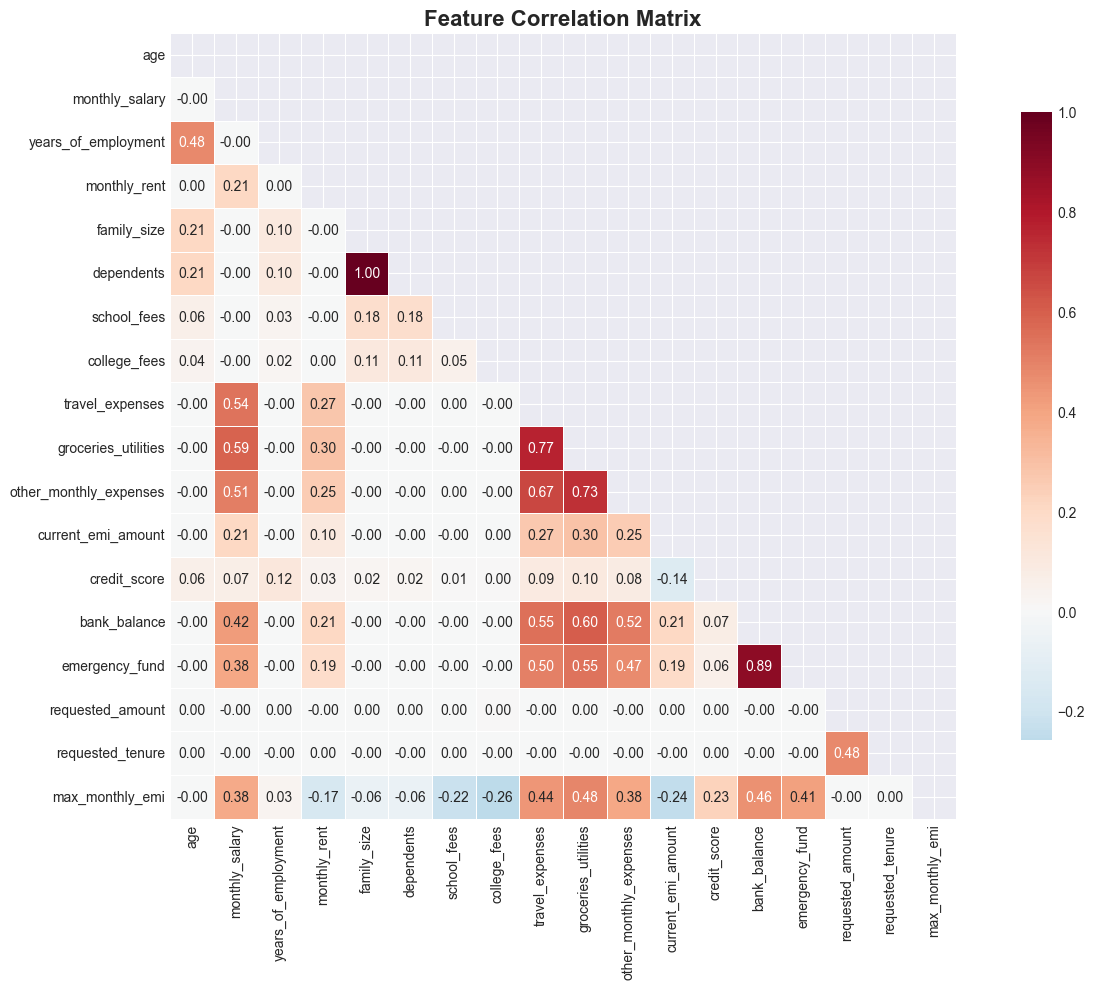

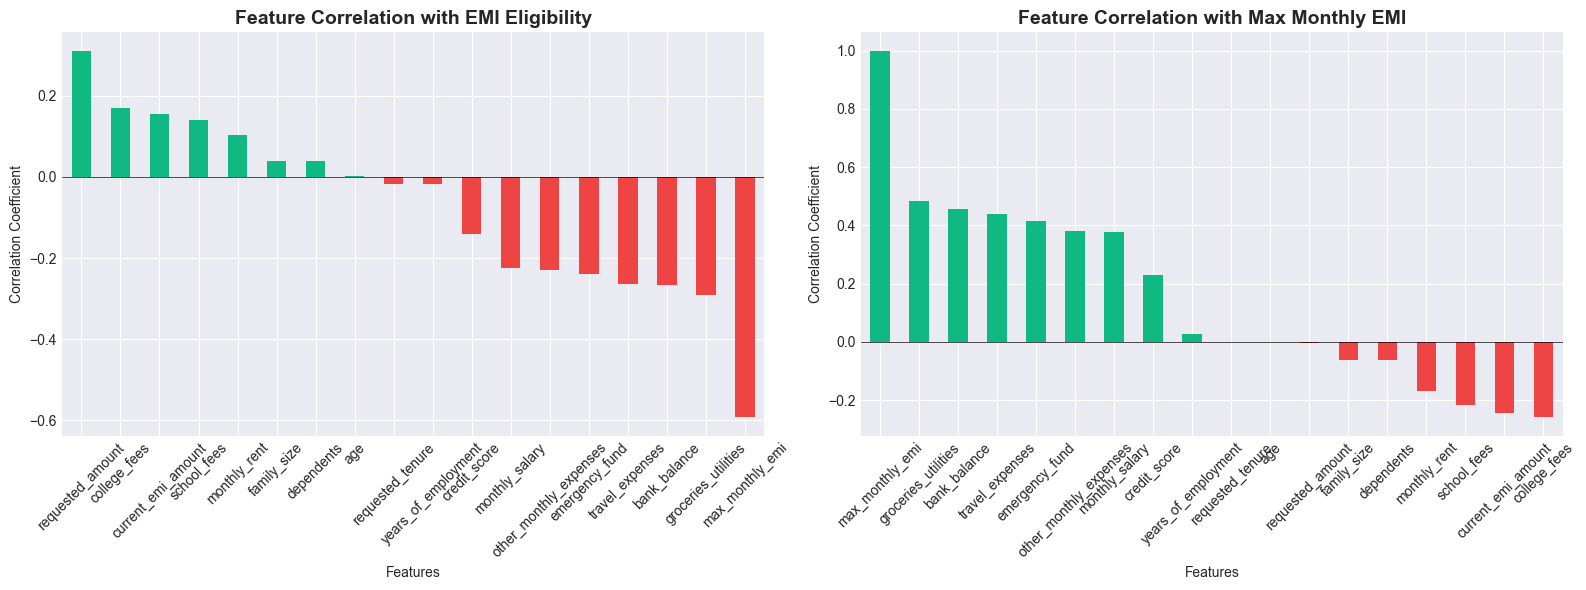

New features created:
- DTI Ratio: 8.36%
- Expense Ratio: 78.36%
- Requested EMI Ratio: 34.63%
- Total Obligation Ratio: 42.98%
- Average Disposable Income: ₹14,831


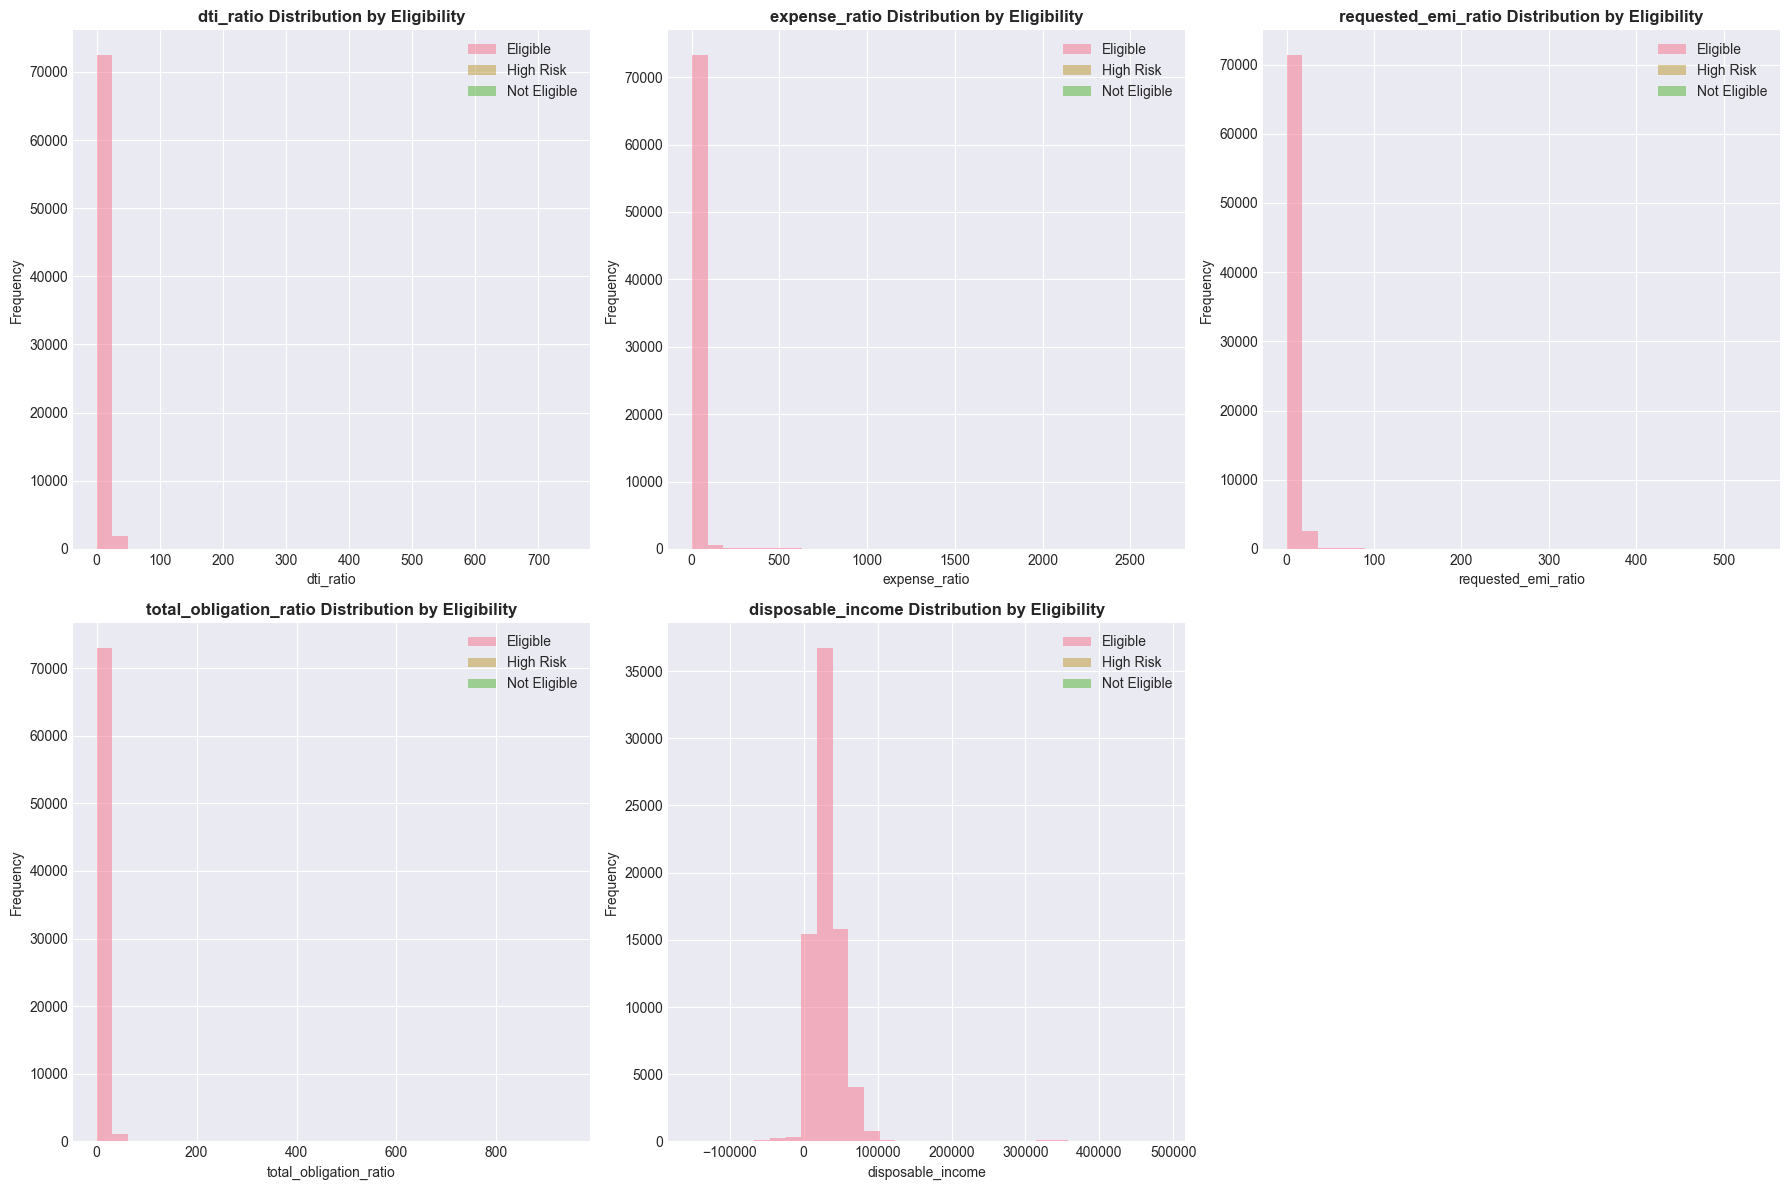

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

📊 DATASET OVERVIEW:
   • Total Records: 404,800
   • Total Features: 27
   • Memory Usage: 83.39 MB

🎯 TARGET VARIABLES:
   • EMI Eligibility:
     - Not_Eligible: 312,868 (77.3%)
     - Eligible: 74,444 (18.4%)
     - High_Risk: 17,488 (4.3%)
   • Max Monthly EMI:
     - Mean: ₹6,764
     - Median: ₹4,211
     - Range: ₹500 - ₹91,040

🔗 TOP CORRELATIONS WITH TARGETS:
   • With EMI Eligibility:
     - requested_amount: 0.312
     - college_fees: 0.170
     - current_emi_amount: 0.155
     - school_fees: 0.141
     - monthly_rent: 0.104
   • With Max Monthly EMI:
     - max_monthly_emi: 1.000
     - groceries_utilities: 0.485
     - bank_balance: 0.456
     - travel_expenses: 0.441
     - emergency_fund: 0.414

👥 DEMOGRAPHIC INSIGHTS:
   • Average Age: 38.9 years
   • Gender Distribution: {'Male': 237427, 'Female': 158351, 'MALE': 1865, 'M': 1843, 'male': 1815, 'F': 1171, 'female': 1165, 'FEMALE': 1163}
   • Most Common Education: Graduate
  

In [2]:
# %% [markdown]
# # 📊 Exploratory Data Analysis - EMIPredict AI
# ## Comprehensive Analysis of Financial Dataset
# 
# This notebook performs detailed exploratory data analysis on 400,000 financial records to understand patterns, distributions, and relationships in the data.

# %% [markdown]
# ## 1. Import Libraries

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# %% [markdown]
# ## 2. Load Dataset

# %%
# Load the dataset - adjust path as needed


# %% [markdown]
# ## 5. EMI Scenario Analysis

# %%
# Distribution across EMI scenarios
scenario_counts = df['emi_scenario'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
bars = axes[0].bar(scenario_counts.index, scenario_counts.values, color='#6366F1', alpha=0.7)
axes[0].set_title('Records per EMI Scenario', fontsize=14, fontweight='bold')
axes[0].set_xlabel('EMI Scenario')
axes[0].set_ylabel('Number of Records')
axes[0].tick_params(axis='x', rotation=45)
for bar, value in zip(bars, scenario_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
                f'{value:,}', ha='center', fontweight='bold')

# Pie chart
axes[1].pie(scenario_counts.values, labels=scenario_counts.index, autopct='%1.1f%%',
            colors=plt.cm.Set3(np.linspace(0, 1, len(scenario_counts))))
axes[1].set_title('Scenario Distribution Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# %%
# %% [markdown]
# ## 2. Load and Prepare Dataset

# %%
# Load the dataset with proper data type handling
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('../data/EMI_dataset.csv')  # Adjust path as needed

# Display basic info
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head()

# %%
# Check data types
print("Data Types:")
print(df.dtypes)
print("\n")

# Check for any columns that might be incorrectly typed
print("Sample values from each column:")
for col in df.columns:
    print(f"{col}: {df[col].iloc[0]} (Type: {type(df[col].iloc[0])})")

# %%
# Convert columns to correct numeric types
# List of columns that should be numeric
numeric_columns = ['age', 'monthly_salary', 'years_of_employment', 'monthly_rent', 
                   'family_size', 'dependents', 'school_fees', 'college_fees', 
                   'travel_expenses', 'groceries_utilities', 'other_monthly_expenses',
                   'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund',
                   'requested_amount', 'requested_tenure', 'max_monthly_emi']

# Convert to numeric, coercing errors to NaN
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for any conversion issues
print("Columns after conversion:")
print(df[numeric_columns].dtypes)

# %%
# Check for missing values after conversion
missing_values = df[numeric_columns].isnull().sum()
print("Missing values after conversion:")
print(missing_values[missing_values > 0])

# %%
# Handle missing values (if any)
# Fill missing values with median for numeric columns
for col in numeric_columns:
    if col in df.columns and df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in {col} with median: {median_val}")

# %%
# Now proceed with the rest of the analysis
print("Data is now ready for analysis!")
print(f"Final shape: {df.shape}")
print("\nData types after cleaning:")
print(df.dtypes)

# %% [markdown]
# ## 3. Basic Information (Now with correct types)

# %%
# Dataset info
print("=== Dataset Info ===")
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")
print("\n=== Data Types Summary ===")
print(df.dtypes.value_counts())
print("\n=== Missing Values ===")
print(df.isnull().sum()[df.isnull().sum() > 0])

# %%
# Statistical summary (now should work correctly)
print("=== Numerical Features Summary ===")
df.describe()

# %%
print("=== Categorical Features Summary ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# %% [markdown]
# ## 4. Target Variable Analysis (Now with fixed types)

# %%
# Classification Target: emi_eligibility
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution
eligibility_counts = df['emi_eligibility'].value_counts()
axes[0].bar(eligibility_counts.index, eligibility_counts.values, color=['#10B981', '#F59E0B', '#EF4444'])
axes[0].set_title('EMI Eligibility Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Eligibility Status')
axes[0].set_ylabel('Count')
for i, v in enumerate(eligibility_counts.values):
    axes[0].text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold')

# Percentage
eligibility_pct = (eligibility_counts / len(df) * 100).round(2)
axes[1].pie(eligibility_pct.values, labels=eligibility_pct.index, autopct='%1.1f%%',
            colors=['#10B981', '#F59E0B', '#EF4444'], startangle=90)
axes[1].set_title('Eligibility Percentage Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# %%
# Regression Target: max_monthly_emi
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution
axes[0, 0].hist(df['max_monthly_emi'], bins=50, color='#6366F1', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Max Monthly EMI', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Max Monthly EMI (₹)')
axes[0, 0].set_ylabel('Frequency')

# Box plot
axes[0, 1].boxplot(df['max_monthly_emi'], vert=False, patch_artist=True,
                    boxprops=dict(facecolor='#10B981'))
axes[0, 1].set_title('Box Plot of Max Monthly EMI', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Max Monthly EMI (₹)')

# Statistics
stats = df['max_monthly_emi'].describe()
axes[1, 0].axis('off')
stats_text = "\n".join([f"{k}: ₹{v:,.0f}" for k, v in stats.items()])
axes[1, 0].text(0.1, 0.5, stats_text, fontsize=12, fontfamily='monospace',
                verticalalignment='center', transform=axes[1, 0].transAxes,
                bbox=dict(boxstyle='round', facecolor='#F3F4F6', alpha=0.8))
axes[1, 0].set_title('Statistical Summary', fontsize=14, fontweight='bold')

# Cumulative distribution
sorted_emi = np.sort(df['max_monthly_emi'].dropna())
cumulative = np.arange(1, len(sorted_emi) + 1) / len(sorted_emi)
axes[1, 1].plot(sorted_emi, cumulative, color='#6366F1', linewidth=2)
axes[1, 1].fill_between(sorted_emi, cumulative, alpha=0.3, color='#6366F1')
axes[1, 1].set_title('Cumulative Distribution Function', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Max Monthly EMI (₹)')
axes[1, 1].set_ylabel('Cumulative Probability')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Continue with the rest of your analysis...
# The remaining cells should now work correctly since data types are fixed
# Eligibility by scenario
eligibility_by_scenario = pd.crosstab(df['emi_scenario'], df['emi_eligibility'], normalize='index') * 100

fig, ax = plt.subplots(figsize=(12, 6))
eligibility_by_scenario.plot(kind='bar', stacked=True, ax=ax,
                            color=['#10B981', '#F59E0B', '#EF4444'])
ax.set_title('Eligibility Distribution by EMI Scenario', fontsize=14, fontweight='bold')
ax.set_xlabel('EMI Scenario')
ax.set_ylabel('Percentage')
ax.legend(title='Eligibility')
ax.tick_params(axis='x', rotation=45)

# Add percentage labels
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 6. Numerical Features Analysis

# %%
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.int64, np.float64]).columns
print(f"Numerical features: {list(numerical_cols)}")

# %%
# Distribution of key numerical features
key_features = ['age', 'monthly_salary', 'credit_score', 'current_emi_amount',
                'requested_amount', 'years_of_employment']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    axes[i].hist(df[feature], bins=50, color='#6366F1', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2,
                    label=f'Mean: {df[feature].mean():.0f}')
    axes[i].axvline(df[feature].median(), color='green', linestyle='--', linewidth=2,
                    label=f'Median: {df[feature].median():.0f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# %%
# Box plots by eligibility
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    df.boxplot(column=feature, by='emi_eligibility', ax=axes[i])
    axes[i].set_title(f'{feature} by Eligibility')
    axes[i].set_xlabel('Eligibility')
    axes[i].set_ylabel(feature)

plt.suptitle('')  # Remove automatic suptitle
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 7. Categorical Features Analysis

# %%
# Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical features: {list(categorical_cols)}")

# %%
# Analyze each categorical feature
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

cat_features = ['gender', 'marital_status', 'education', 'employment_type', 
                'company_type', 'house_type']

for i, feature in enumerate(cat_features):
    if i < len(axes):
        counts = df[feature].value_counts()
        axes[i].bar(counts.index, counts.values, color='#10B981', alpha=0.7)
        axes[i].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Add value labels
        for j, v in enumerate(counts.values):
            axes[i].text(j, v + 100, f'{v:,}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# %%
# Eligibility by categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(cat_features):
    if i < len(axes):
        cross_tab = pd.crosstab(df[feature], df['emi_eligibility'], normalize='index') * 100
        cross_tab.plot(kind='bar', stacked=True, ax=axes[i],
                      color=['#10B981', '#F59E0B', '#EF4444'])
        axes[i].set_title(f'Eligibility by {feature}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Percentage')
        axes[i].legend(title='Eligibility', loc='upper right')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylim([0, 100])

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 8. Correlation Analysis

# %%
# Correlation matrix
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# %%
# Top correlations with targets
target_cols = ['emi_eligibility_encoded', 'max_monthly_emi']

# Create encoded version of eligibility for correlation
df_encoded = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded['emi_eligibility_encoded'] = le.fit_transform(df['emi_eligibility'])

# Get correlations
corr_with_target = df_encoded[numerical_cols].corrwith(df_encoded['emi_eligibility_encoded']).sort_values(ascending=False)
corr_with_emi = df_encoded[numerical_cols].corrwith(df_encoded['max_monthly_emi']).sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correlation with eligibility
corr_with_target.plot(kind='bar', ax=axes[0], color=['#10B981' if x > 0 else '#EF4444' for x in corr_with_target])
axes[0].set_title('Feature Correlation with EMI Eligibility', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Correlation Coefficient')
axes[0].tick_params(axis='x', rotation=45)
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Correlation with max EMI
corr_with_emi.plot(kind='bar', ax=axes[1], color=['#10B981' if x > 0 else '#EF4444' for x in corr_with_emi])
axes[1].set_title('Feature Correlation with Max Monthly EMI', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Correlation Coefficient')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 9. Feature Engineering - Creating New Features for Analysis

# %%
# Create derived features for deeper analysis
df_analysis = df.copy()

# Debt-to-Income Ratio
df_analysis['dti_ratio'] = (df_analysis['current_emi_amount'] / df_analysis['monthly_salary']) * 100

# Expense-to-Income Ratio
expense_cols = ['monthly_rent', 'school_fees', 'college_fees', 'travel_expenses',
                'groceries_utilities', 'other_monthly_expenses']
df_analysis['total_expenses'] = df_analysis[expense_cols].sum(axis=1)
df_analysis['expense_ratio'] = (df_analysis['total_expenses'] / df_analysis['monthly_salary']) * 100

# Requested EMI
df_analysis['requested_emi'] = df_analysis['requested_amount'] / df_analysis['requested_tenure']
df_analysis['requested_emi_ratio'] = (df_analysis['requested_emi'] / df_analysis['monthly_salary']) * 100

# Total obligation ratio
df_analysis['total_obligation_ratio'] = ((df_analysis['current_emi_amount'] + df_analysis['requested_emi']) / 
                                         df_analysis['monthly_salary']) * 100

# Disposable income
df_analysis['disposable_income'] = (df_analysis['monthly_salary'] - df_analysis['total_expenses'] - 
                                     df_analysis['current_emi_amount'])

print("New features created:")
print(f"- DTI Ratio: {df_analysis['dti_ratio'].mean():.2f}%")
print(f"- Expense Ratio: {df_analysis['expense_ratio'].mean():.2f}%")
print(f"- Requested EMI Ratio: {df_analysis['requested_emi_ratio'].mean():.2f}%")
print(f"- Total Obligation Ratio: {df_analysis['total_obligation_ratio'].mean():.2f}%")
print(f"- Average Disposable Income: ₹{df_analysis['disposable_income'].mean():,.0f}")

# %%
# Analyze new features by eligibility
new_features = ['dti_ratio', 'expense_ratio', 'requested_emi_ratio', 'total_obligation_ratio', 'disposable_income']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(new_features):
    if i < len(axes):
        for eligibility in ['Eligible', 'High Risk', 'Not Eligible']:
            subset = df_analysis[df_analysis['emi_eligibility'] == eligibility]
            axes[i].hist(subset[feature], bins=30, alpha=0.5, label=eligibility)
        axes[i].set_title(f'{feature} Distribution by Eligibility', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()

# Hide unused subplot
if len(new_features) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 10. Key Insights Summary

# %%
# Generate key insights
print("=" * 80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# Overall statistics
print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total Records: {df.shape[0]:,}")
print(f"   • Total Features: {df.shape[1]}")
print(f"   • Memory Usage: {df.memory_usage().sum() / 1024**2:.2f} MB")

# Target distribution
print(f"\n🎯 TARGET VARIABLES:")
print(f"   • EMI Eligibility:")
for status, count in df['emi_eligibility'].value_counts().items():
    pct = (count / len(df)) * 100
    print(f"     - {status}: {count:,} ({pct:.1f}%)")
print(f"   • Max Monthly EMI:")
print(f"     - Mean: ₹{df['max_monthly_emi'].mean():,.0f}")
print(f"     - Median: ₹{df['max_monthly_emi'].median():,.0f}")
print(f"     - Range: ₹{df['max_monthly_emi'].min():,.0f} - ₹{df['max_monthly_emi'].max():,.0f}")

# Key correlations
print(f"\n🔗 TOP CORRELATIONS WITH TARGETS:")
print(f"   • With EMI Eligibility:")
top_corr_class = corr_with_target.head(5)
for feat, corr in top_corr_class.items():
    print(f"     - {feat}: {corr:.3f}")
print(f"   • With Max Monthly EMI:")
top_corr_reg = corr_with_emi.head(5)
for feat, corr in top_corr_reg.items():
    print(f"     - {feat}: {corr:.3f}")

# Demographic insights
print(f"\n👥 DEMOGRAPHIC INSIGHTS:")
print(f"   • Average Age: {df['age'].mean():.1f} years")
print(f"   • Gender Distribution: {df['gender'].value_counts().to_dict()}")
print(f"   • Most Common Education: {df['education'].mode()[0]}")
print(f"   • Most Common Employment: {df['employment_type'].mode()[0]}")

# Financial insights
print(f"\n💰 FINANCIAL INSIGHTS:")
print(f"   • Average Monthly Salary: ₹{df['monthly_salary'].mean():,.0f}")
print(f"   • Average Credit Score: {df['credit_score'].mean():.0f}")
print(f"   • Average Current EMI: ₹{df['current_emi_amount'].mean():,.0f}")
print(f"   • Average Requested Amount: ₹{df['requested_amount'].mean():,.0f}")

# Risk factors
print(f"\n⚠️ RISK FACTORS BY ELIGIBILITY:")
for status in ['Not Eligible', 'High Risk', 'Eligible']:
    subset = df[df['emi_eligibility'] == status]
    print(f"\n   • {status}:")
    print(f"     - Avg Credit Score: {subset['credit_score'].mean():.0f}")
    print(f"     - Avg DTI (estimated): {(subset['current_emi_amount'] / subset['monthly_salary'] * 100).mean():.1f}%")
    print(f"     - Avg Years Employed: {subset['years_of_employment'].mean():.1f}")
    print(f"     - Avg Age: {subset['age'].mean():.1f}")

print("\n" + "=" * 80)

# %%
# Save cleaned data for modeling
print("\n💾 Saving processed data for modeling...")
df_analysis.to_csv('../data/processed_emi_data.csv', index=False)
print("✅ Data saved to '../data/processed_emi_data.csv'")